In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

<AxesSubplot:>

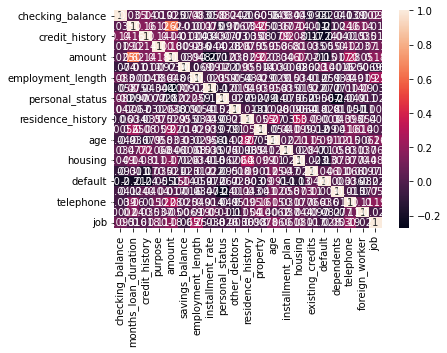

In [34]:
import pandas as pd
cr= pd.read_excel("credit.xlsx")
cr["credit_history"].replace(['critical','repaid','delayed','fully repaid this bank','fully repaid'],[0,1,2,3,4],inplace=True)
cr['checking_balance'].replace(['unknown','< 0 DM','1 - 200 DM','> 200 DM'],[0,1,2,3],inplace=True)
cr['purpose'].replace(['radio/tv','car (new)','furniture','car (used)','business','education','repairs','domestic appliances','retraining','others'],[0,1,2,3,4,5,6,7,8,9],inplace=True)
cr['savings_balance'].replace(['< 100 DM','unknown','101 - 500 DM','501 - 1000 DM','> 1000 DM'],[0,1,2,3,4],inplace=True)
cr['employment_length'].replace(['1 - 4 yrs','> 7 yrs','4 - 7 yrs','0 - 1 yrs','unemployed'],[0,1,2,3,4],inplace=True)
cr['personal_status'].replace(['single male','female','married male','divorced male'],[0,1,2,3],inplace=True)
cr['other_debtors'].replace(['none','guarantor','co-applicant'],[0,1,2],inplace=True)
cr['property'].replace(['real estate','building society savings','unknown/none','other'],[0,1,2,3],inplace=True)
cr['installment_plan'].replace(['none','bank','stores'],[0,1,2],inplace=True)
cr['housing'].replace(['own','rent','for free'],[0,1,2],inplace=True)
cr['telephone'].replace(['none','yes'],[0,1],inplace=True)
cr['foreign_worker'].replace(['no','yes'],[0,1],inplace=True)
cr['job'].replace(['skilled employee','unskilled resident','mangement self-employed','unemployed non-resident'],[0,1,2,3],inplace=True)
cr.drop('Credit-historynum',inplace=True,axis=1)
cr['default'].replace([1,2],[1,0],inplace=True)
import seaborn as sns
corr_matrix = cr.corr()
sns.heatmap(corr_matrix, annot = True)

In [9]:
cr['job'].value_counts()
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int64
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int64
 3   purpose               1000 non-null   int64
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int64
 6   employment_length     1000 non-null   int64
 7   installment_rate      1000 non-null   int64
 8   personal_status       1000 non-null   int64
 9   other_debtors         1000 non-null   int64
 10  residence_history     1000 non-null   int64
 11  property              1000 non-null   int64
 12  age                   1000 non-null   int64
 13  installment_plan      1000 non-null   int64
 14  housing               1000 non-null   int64
 15  existing_credits      1000 non-null   int64
 16  default

In [10]:
def to_numeric:
    if Dtype == "object":
        
cr.columns,cr.shape

SyntaxError: invalid syntax (3686709090.py, line 1)

In [11]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [12]:
#multiple Linear regression
x=cr[['months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_length', 'installment_rate',
       'personal_status', 'other_debtors', 'residence_history', 'property',
       'age', 'installment_plan', 'housing', 'existing_credits', 'checking_balance',
       'dependents', 'telephone', 'foreign_worker', 'job']]
y=cr['default']

#with sklearn
regr = LinearRegression()
regr.fit(x,y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 1.253837801611783
Coefficients: 
 [-3.89722378e-03 -7.61277037e-02  8.10934972e-05 -1.60094258e-05
  4.62752722e-02 -1.04518307e-02 -4.94248024e-02 -5.42561142e-02
 -2.04548136e-02 -7.21586260e-03 -1.06243262e-02  2.67347405e-03
 -5.30834226e-02 -5.68997340e-02 -5.92045975e-03 -7.01659112e-02
 -3.99408978e-02  7.09791316e-02 -1.12049451e-01  1.42372439e-03]
                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     10.03
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           1.51e-28
Time:                        05:06:16   Log-Likelihood:                -545.42
No. Observations:                1000   AIC:                             1133.
Df Residuals:                     979   BIC:                             1

In [13]:
#Split the data into train data and test data (This helps me to perfom analysis on one set and then we test its fitness to the model.)
from sklearn.model_selection import train_test_split
x=cr[['months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_length', 'installment_rate',
       'personal_status', 'other_debtors', 'residence_history', 'property',
       'age', 'installment_plan', 'housing', 'existing_credits', 'checking_balance',
       'dependents', 'telephone', 'foreign_worker', 'job']]
y=cr['default']
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [23]:
#Fitting the data to a logistic regression.
glm = sm.GLM(y,
x,
family=sm.families.Binomial())
results = glm.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      980
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -537.55
Date:                Fri, 13 Oct 2023   Deviance:                       1075.1
Time:                        05:13:24   Pearson chi2:                     998.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1364
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
months_loan_duration    -0.0198 

In [24]:
# .params returns the parameters for the logistic regression.
#.predict() enables us to see probabilities
results.params
probs = results.predict()
probs[:10]

array([0.96580008, 0.36301943, 0.93216875, 0.54658222, 0.65321285,
       0.70265163, 0.9379963 , 0.48196989, 0.96352538, 0.4917384 ])

In [25]:
results.predict()

array([0.96580008, 0.36301943, 0.93216875, 0.54658222, 0.65321285,
       0.70265163, 0.9379963 , 0.48196989, 0.96352538, 0.4917384 ,
       0.44222949, 0.35610216, 0.65415093, 0.87871001, 0.59785682,
       0.74482651, 0.92056212, 0.37364865, 0.35450121, 0.92206897,
       0.93599853, 0.92837052, 0.80782826, 0.88938606, 0.71189415,
       0.81592815, 0.56726689, 0.75897864, 0.6952629 , 0.70633941,
       0.85517569, 0.45654767, 0.81013915, 0.90456177, 0.50465553,
       0.49472754, 0.520027  , 0.40961278, 0.71007904, 0.62189404,
       0.78289049, 0.78281554, 0.77091381, 0.7084453 , 0.41445841,
       0.83536438, 0.86635431, 0.86141086, 0.88700951, 0.8349582 ,
       0.45253227, 0.58934633, 0.73001981, 0.85363034, 0.46768476,
       0.71163344, 0.83718759, 0.52650053, 0.42174439, 0.54667139,
       0.60035026, 0.9109421 , 0.37232117, 0.1665448 , 0.70976761,
       0.94047328, 0.66866429, 0.79311696, 0.43641546, 0.65327392,
       0.54472554, 0.92324062, 0.84792088, 0.56257112, 0.78093

In [30]:
labels = np.array([0]*1000)
labels[probs >0.5] = 1

In [31]:
confusion_table(labels,cr.default)

Truth,0,1
Predicted,,
0,88,75
1,212,625


In [35]:
!pip install pycaret

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.



  Using cached pycaret-3.1.0-py3-none-any.whl (483 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached lightgbm-4.1.0-py3-none-win_amd64.whl (1.3 MB)
  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
  Using cached importlib_metadata-6.8.0-py3-none-any.whl (22 kB)
  Using cached sktime-0.21.1-py3-none-any.whl (17.1 MB)
  Using cached xxhash-3.4.1-cp39-cp39-win_amd64.whl (29 kB)
  Using cached category_encoders-2.6.2-py2.py3-none-any.whl (81 kB)
  Using cached schemdraw-0.15-py3-none-any.whl (106 kB)
  Using cached pmdarima-2.0.3-cp39-cp39-win_amd64.whl (572 kB)
  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl (65.9 MB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Using cached psutil-5.9.5-cp36-abi3-win_amd64.whl (255 kB)
  Using cached plotly_resampler-0.9.1-py3-none-any.whl (73 kB)
  Using cached tbats-1.1.3-py3-none-any.whl (44 kB)
  Using cached pyod-1.1.0-py3-